In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
from sklearn import metrics

In [2]:
data = pd.read_csv('Sales.csv')
data

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3109,POCO,M4 Pro 5G,Cool Blue,6 GB,128 GB,Yes,4.4,16999,19999,POCO M4 Pro 5G,3000,15.000750
3110,Nokia,225,Black,NaN,Expandable Upto 32 GB,Yes,3.6,3499,3499,Nokia 225,0,0.000000
3111,Apple,iPhone SE,White,2 GB,128 GB,Yes,4.5,44900,44900,Apple iPhone SE,0,0.000000
3112,Apple,iPhone 13 Pro,Gold,6 GB,128 GB,Yes,NaN,119900,119900,Apple iPhone 13 Pro,0,0.000000


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


In [96]:
data1 = data.drop(['Models', 'Mobile'], axis=1)
data1.columns
data1.head(3)

,Brands,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Discount,discount percentage
0,SAMSUNG,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,1669,7.947998
1,Nokia,Steel,2 GB,16 GB,Yes,3.8,10199,10199,0,0.000000
2,realme,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,1000,12.501563


In [97]:
data1.Brands.unique()

array(['SAMSUNG', 'Nokia', 'realme', 'Infinix', 'Apple', 'GIONEE',
       'Xiaomi', 'OPPO', 'vivo', 'Lenovo', 'ASUS', 'Motorola', 'HTC',
       'Google Pixel', 'LG', 'POCO', 'IQOO'], dtype=object)

In [98]:
data1_brand = pd.get_dummies(data1.Brands, prefix='brand')
brcol = data1_brand.columns
brcol

Index(['brand_ASUS', 'brand_Apple', 'brand_GIONEE', 'brand_Google Pixel',
       'brand_HTC', 'brand_IQOO', 'brand_Infinix', 'brand_LG', 'brand_Lenovo',
       'brand_Motorola', 'brand_Nokia', 'brand_OPPO', 'brand_POCO',
       'brand_SAMSUNG', 'brand_Xiaomi', 'brand_realme', 'brand_vivo'],
      dtype='object')

In [99]:
for i in brcol:
    data1_brand[i] = data1_brand[i].map({True:1 , False:0})

In [100]:
data2 = pd.concat((data1, data1_brand), axis=1)
data2 = data2.drop(['Brands'], axis=1)

In [101]:
data2.head(3)

,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Discount,discount percentage,brand_ASUS,...,brand_LG,brand_Lenovo,brand_Motorola,brand_Nokia,brand_OPPO,brand_POCO,brand_SAMSUNG,brand_Xiaomi,brand_realme,brand_vivo
0,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,1669,7.947998,0,...,0,0,0,0,0,0,1,0,0,0
1,Steel,2 GB,16 GB,Yes,3.8,10199,10199,0,0.000000,0,...,0,0,0,1,0,0,0,0,0,0
2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,1000,12.501563,0,...,0,0,0,0,0,0,0,0,1,0


In [102]:
color = data2.Colors.unique()
color

array(['Mirage Black', 'Steel', 'Diamond Black', 'Ice Blue', 'Black',
       'Pink', 'Coral', 'Brown', 'Aquamarine Blue', 'Red', 'Nebula',
       'Moonlight Black', 'Sunshine Gold', 'Nebula Blue', 'Gold',
       'Sprite', 'Blue', 'Grey', 'White', 'Arctic White', 'Laser Blue',
       'Illuminating Yellow', 'Polaris Blue', 'Prism Crush Black',
       'Midnight Black', 'Bordeaux Red ', 'Green', 'That Green',
       'Fine Gold', 'Just Black', 'Violet', 'CHAMPAGNE GOLD', 'Neo Blue',
       'Purple', 'Prism Black', 'Jet Black', 'Silver', 'Yellow',
       'Starry Night', 'Startrails Blue', 'Ocean Blue', 'Fusion Blue',
       'Gold Platinum', 'Titan', 'Victory Blue', 'Celestial Silver',
       'Lightning Red', 'Pebble Grey', 'Gold Sepia', 'COSMIC BLACK',
       'Prism White', 'Glacier Green', 'Space Black', 'Champagne',
       'Stealth Black', 'Sky Blue', 'Forest Green', 'Black Sapphire',
       'Blazing Blue', 'Chroma White', 'Lake Green', 'Rust Red',
       'Crystal Silver', 'Lunar White', '

In [103]:
ncol = {}
for i in color:
    if 'blue' in i.lower():
        ncol[i] = 'Blue'
    elif 'green' in i.lower():
        ncol[i] = 'Green'
    elif 'gray' in i.lower():
        ncol[i] = 'Gray'
    elif 'gold' in i.lower():
        ncol[i] = 'Gold'
    elif 'red' in i.lower():
        ncol[i] = 'Red'   
    elif 'black' in i.lower():
        ncol[i] = 'Black'
    elif 'white' in i.lower():
        ncol[i] = 'White' 
    elif 'pink' in i.lower():
        ncol[i] = 'Pink'
    elif 'purple' in i.lower():
        ncol[i] = 'Purple'
    elif 'silver' in i.lower():
        ncol[i] = 'Silver'
    elif 'titan' in i.lower():
        ncol[i] = 'Titan'
    elif 'platinum' in i.lower():
        ncol[i] = 'Platinum'
    elif 'night' in i.lower():
        ncol[i] = 'Night'
    elif 'violet' in i.lower():
        ncol[i] = 'Violet'
    elif 'nebula' in i.lower():
        ncol[i] = 'Nebula'
    elif 'coral' in i.lower():
        ncol[i] = 'Coral'    
    elif 'brown' in i.lower():
        ncol[i] = 'Brown'
    elif 'mint' in i.lower():
        ncol[i] = 'Mint'
    elif 'orange' in i.lower():
        ncol[i] = 'Orange'
    elif 'cyan' in i.lower():
        ncol[i] = 'Cyan'    
    elif 'bronze' in i.lower():
        ncol[i] = 'Bronze'
    elif 'aqua' in i.lower():
        ncol[i] = 'Aqua'
    elif 'navy' in i.lower():
        ncol[i] = 'Navy'
    elif 'copper' in i.lower():
        ncol[i] = 'Copper'    
    elif 'sand' in i.lower():
        ncol[i] = 'Sand'

In [12]:
data2.Colors = data2.Colors.map(ncol)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Colors               2813 non-null   object 
 1   Memory               3071 non-null   object 
 2   Storage              3075 non-null   object 
 3   Camera               3114 non-null   object 
 4   Rating               2970 non-null   float64
 5   Selling Price        3114 non-null   int64  
 6   Original Price       3114 non-null   int64  
 7   Discount             3114 non-null   int64  
 8   discount percentage  3114 non-null   float64
 9   brand_ASUS           3114 non-null   int64  
 10  brand_Apple          3114 non-null   int64  
 11  brand_GIONEE         3114 non-null   int64  
 12  brand_Google Pixel   3114 non-null   int64  
 13  brand_HTC            3114 non-null   int64  
 14  brand_IQOO           3114 non-null   int64  
 15  brand_Infinix        3114 non-null   i

In [13]:
data3 = data2.dropna()

In [14]:
data3.info()
data3.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 2617 entries, 0 to 3113
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Colors               2617 non-null   object 
 1   Memory               2617 non-null   object 
 2   Storage              2617 non-null   object 
 3   Camera               2617 non-null   object 
 4   Rating               2617 non-null   float64
 5   Selling Price        2617 non-null   int64  
 6   Original Price       2617 non-null   int64  
 7   Discount             2617 non-null   int64  
 8   discount percentage  2617 non-null   float64
 9   brand_ASUS           2617 non-null   int64  
 10  brand_Apple          2617 non-null   int64  
 11  brand_GIONEE         2617 non-null   int64  
 12  brand_Google Pixel   2617 non-null   int64  
 13  brand_HTC            2617 non-null   int64  
 14  brand_IQOO           2617 non-null   int64  
 15  brand_Infinix        2617 non-null   int64 

,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Discount,discount percentage,brand_ASUS,...,brand_LG,brand_Lenovo,brand_Motorola,brand_Nokia,brand_OPPO,brand_POCO,brand_SAMSUNG,brand_Xiaomi,brand_realme,brand_vivo
0,Black,8 GB,128 GB,Yes,4.3,19330,20999,1669,7.947998,0,...,0,0,0,0,0,0,1,0,0,0
3,Blue,4 GB,64 GB,Yes,4.2,12999,12999,0,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
4,Black,4GB,64 GB,Yes,4.6,49900,49900,0,0.000000,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
data3.Colors.value_counts()

Colors
Black       826
Blue        516
White       311
Gold        288
Silver      168
Red         140
Green       132
Purple       64
Violet       33
Gray         22
Pink         15
Cyan         13
Titan        13
Mint         12
Coral        10
Night         9
Orange        8
Brown         8
Copper        7
Platinum      6
Sand          5
Bronze        5
Nebula        3
Aqua          2
Navy          1
Name: count, dtype: int64

In [16]:
data3_color = pd.get_dummies(data3.Colors, prefix='color')
data3_color.columns

Index(['color_Aqua', 'color_Black', 'color_Blue', 'color_Bronze',
       'color_Brown', 'color_Copper', 'color_Coral', 'color_Cyan',
       'color_Gold', 'color_Gray', 'color_Green', 'color_Mint', 'color_Navy',
       'color_Nebula', 'color_Night', 'color_Orange', 'color_Pink',
       'color_Platinum', 'color_Purple', 'color_Red', 'color_Sand',
       'color_Silver', 'color_Titan', 'color_Violet', 'color_White'],
      dtype='object')

In [17]:
data3_color = data3_color.drop(['color_Night', 'color_Orange', 'color_Platinum', 'color_Sand','color_Aqua', 'color_Nebula',
                                'color_Bronze', 'color_Copper', 'color_Brown', 'color_Navy'], axis=1)

In [18]:
for i in data3_color:
    data3_color[i] = data3_color[i].map({True:1, False:0})

In [19]:
data3 = pd.concat((data3, data3_color), axis=1)
data3 = data3.drop(['Colors', 'Camera', 'Original Price'], axis=1)

In [82]:
data2.head(3)

,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Discount,discount percentage,brand_ASUS,...,brand_LG,brand_Lenovo,brand_Motorola,brand_Nokia,brand_OPPO,brand_POCO,brand_SAMSUNG,brand_Xiaomi,brand_realme,brand_vivo
0,Black,8 GB,128 GB,Yes,4.3,19330,20999,1669,7.947998,0,...,0,0,0,0,0,0,1,0,0,0
1,NaN,2 GB,16 GB,Yes,3.8,10199,10199,0,0.000000,0,...,0,0,0,1,0,0,0,0,0,0
2,Black,2 GB,NaN,Yes,4.4,6999,7999,1000,12.501563,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
data3['Memory'].unique()

array(['8 GB', '4 GB', '4GB', '8 MB', '3 GB', '1.5 GB', '6 GB', '1 GB',
       '2 GB', '2 MB', '512 MB', '12 GB', '768 MB', '10 MB', '32 MB',
       '4 MB', '16 MB', '64 MB', '128 MB', '153 MB', '30 MB', '46 MB',
       '100 MB', '16 GB'], dtype=object)

In [21]:
data3['Storage'].unique()

array(['128 GB', '64 GB', '16 MB', '16 GB', '256 GB', '32 GB', '8 GB',
       '512 GB', '2 MB', '4 GB', 'Expandable Upto 16 GB', '64 MB',
       'Expandable Upto 32 GB', '4 MB', '128 MB', '1 TB', '512 MB',
       '129 GB', '256 MB', '153 MB', '130 GB', '8 MB', '10 MB', '100 MB'],
      dtype=object)

In [22]:
nmem = {}
nstor = {}
for i in data3.Storage:
    if 'MB' in i:
        nstor[i] = float(i[:-2]) / 1000
    elif 'GB' in i and i != 'Expandable Upto 16 GB' and i != 'Expandable Upto 32 GB':
        nstor[i] = float(i[:-2]) / 1
    elif 'TB' in i:
        nstor[i] = float(i[:-2]) * 1000

In [23]:
for i in data3.Memory:
    if 'MB' in i:
        nmem[i] = float(i[:-2]) / 1000
    elif 'GB' in i:
        nmem[i] = float(i[:-2]) / 1

In [24]:
data3['Memory'] = data3['Memory'].map(nmem)
data3['Storage'] = data3['Storage'].map(nstor)

In [25]:
data3['Storage'].astype(float)
data3['Memory'].astype(float)

0       8.000
3       4.000
4       4.000
5       0.008
7       3.000
        ...  
3107    0.512
3108    0.004
3109    6.000
3111    2.000
3113    3.000
Name: Memory, Length: 2617, dtype: float64

In [26]:
data3.Storage.unique()

array([1.28e+02, 6.40e+01, 1.60e-02, 1.60e+01, 2.56e+02, 3.20e+01,
       8.00e+00, 5.12e+02, 2.00e-03, 4.00e+00,      nan, 6.40e-02,
       4.00e-03, 1.28e-01, 1.00e+03, 5.12e-01, 1.29e+02, 2.56e-01,
       1.53e-01, 1.30e+02, 8.00e-03, 1.00e-02, 1.00e-01])

In [27]:
data3.Memory.unique()

array([8.00e+00, 4.00e+00, 8.00e-03, 3.00e+00, 1.50e+00, 6.00e+00,
       1.00e+00, 2.00e+00, 2.00e-03, 5.12e-01, 1.20e+01, 7.68e-01,
       1.00e-02, 3.20e-02, 4.00e-03, 1.60e-02, 6.40e-02, 1.28e-01,
       1.53e-01, 3.00e-02, 4.60e-02, 1.00e-01, 1.60e+01])

In [28]:
data3 = data3.dropna()
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2601 entries, 0 to 3113
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Memory               2601 non-null   float64
 1   Storage              2601 non-null   float64
 2   Rating               2601 non-null   float64
 3   Selling Price        2601 non-null   int64  
 4   Discount             2601 non-null   int64  
 5   discount percentage  2601 non-null   float64
 6   brand_ASUS           2601 non-null   int64  
 7   brand_Apple          2601 non-null   int64  
 8   brand_GIONEE         2601 non-null   int64  
 9   brand_Google Pixel   2601 non-null   int64  
 10  brand_HTC            2601 non-null   int64  
 11  brand_IQOO           2601 non-null   int64  
 12  brand_Infinix        2601 non-null   int64  
 13  brand_LG             2601 non-null   int64  
 14  brand_Lenovo         2601 non-null   int64  
 15  brand_Motorola       2601 non-null   int64 

In [29]:
data3.head(3)

,Memory,Storage,Rating,Selling Price,Discount,discount percentage,brand_ASUS,brand_Apple,brand_GIONEE,brand_Google Pixel,...,color_Gray,color_Green,color_Mint,color_Pink,color_Purple,color_Red,color_Silver,color_Titan,color_Violet,color_White
0,8.0,128.0,4.3,19330,1669,7.947998,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,64.0,4.2,12999,0,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,64.0,4.6,49900,0,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Selling Price', ylabel='Count'>

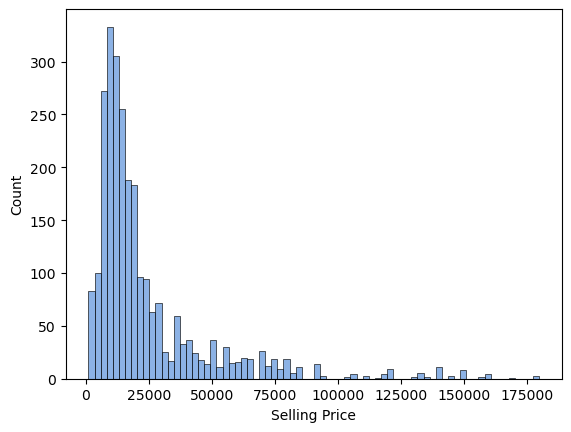

In [30]:
sns.histplot(x='Selling Price', data=data3, color='#69d')

In [31]:
data3.describe()

,Memory,Storage,Rating,Selling Price,Discount,discount percentage,brand_ASUS,brand_Apple,brand_GIONEE,brand_Google Pixel,...,color_Gray,color_Green,color_Mint,color_Pink,color_Purple,color_Red,color_Silver,color_Titan,color_Violet,color_White
count,2601.000000,2601.000000,2601.000000,2601.000000,2601.000000,2601.000000,2601.000000,2601.000000,2601.000000,2601.000000,...,2601.000000,2601.000000,2601.000000,2601.000000,2601.000000,2601.000000,2601.000000,2601.000000,2601.000000,2601.000000
mean,4.069041,84.119555,4.241176,24147.316417,1871.848135,6.071157,0.040369,0.102653,0.044598,0.009996,...,0.008458,0.050750,0.004614,0.005767,0.024606,0.053441,0.064591,0.004998,0.012687,0.119185
std,2.388950,91.045020,0.272157,25536.625850,5266.177178,11.320535,0.196861,0.303563,0.206460,0.099499,...,0.091597,0.219528,0.067780,0.075736,0.154951,0.224954,0.245849,0.070534,0.111943,0.324068
min,0.002000,0.002000,2.300000,1000.000000,-8000.000000,-160.320641,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,32.000000,4.100000,9990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,64.000000,4.300000,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,128.000000,4.400000,26828.000000,2000.000000,9.375293,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,1000.000000,5.000000,179900.000000,75000.000000,70.610305,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
data3.corr()

,Memory,Storage,Rating,Selling Price,Discount,discount percentage,brand_ASUS,brand_Apple,brand_GIONEE,brand_Google Pixel,...,color_Gray,color_Green,color_Mint,color_Pink,color_Purple,color_Red,color_Silver,color_Titan,color_Violet,color_White
Memory,1.000000,0.581041,0.353113,0.328963,0.291351,0.197748,-0.025556,-0.120622,-0.161638,-0.006141,...,0.041272,0.059150,0.057415,-0.019208,0.045282,-0.013659,0.018934,-0.030581,0.062881,-0.042182
Storage,0.581041,1.000000,0.435023,0.721687,0.189205,0.066114,-0.051685,0.356089,-0.139660,0.004963,...,0.015006,0.126548,0.022847,-0.024419,0.035561,0.024026,0.100073,-0.042976,0.026871,-0.034193
Rating,0.353113,0.435023,1.000000,0.443664,0.105844,0.057076,-0.118618,0.406911,-0.316077,0.106943,...,-0.012434,0.116291,0.010548,-0.004061,0.078114,0.070841,0.070028,-0.030761,0.000520,-0.109740
Selling Price,0.328963,0.721687,0.443664,1.000000,0.247375,-0.036205,-0.050493,0.632718,-0.144284,0.162053,...,0.038360,0.099269,-0.008313,0.041275,0.025175,0.029728,0.183034,-0.017422,0.007171,-0.031423
Discount,0.291351,0.189205,0.105844,0.247375,1.000000,0.665863,-0.033406,0.082286,-0.047925,-0.022519,...,0.053943,0.029533,0.027250,-0.024183,0.007404,-0.028109,0.059595,-0.016924,0.051366,-0.033065
discount percentage,0.197748,0.066114,0.057076,-0.036205,0.665863,1.000000,-0.084023,-0.049094,-0.005753,-0.033417,...,0.038737,0.068065,0.056650,-0.032441,0.034163,-0.045972,0.021612,-0.012342,0.027463,-0.032794
brand_ASUS,-0.025556,-0.051685,-0.118618,-0.050493,-0.033406,-0.084023,1.000000,-0.069371,-0.044314,-0.020610,...,-0.018943,-0.047424,-0.013964,0.113362,-0.019968,0.003376,0.041467,0.068561,-0.023250,-0.009130
brand_Apple,-0.120622,0.356089,0.406911,0.632718,0.082286,-0.049094,-0.069371,1.000000,-0.073075,-0.033986,...,-0.003574,0.089168,-0.023027,-0.025759,0.044402,0.111132,0.168802,-0.023971,-0.038341,-0.042312
brand_GIONEE,-0.161638,-0.139660,-0.316077,-0.144284,-0.047925,-0.005753,-0.044314,-0.073075,1.000000,-0.021710,...,-0.019955,-0.049957,-0.014709,-0.016455,-0.034316,-0.001649,-0.049197,-0.015313,-0.024492,0.035494
brand_Google Pixel,-0.006141,0.004963,0.106943,0.162053,-0.022519,-0.033417,-0.020610,-0.033986,-0.021710,1.000000,...,-0.009281,-0.023234,-0.006841,0.196504,-0.015960,-0.023876,0.005042,-0.007122,-0.011391,0.058462


In [33]:
X = data3.drop(['Selling Price'], axis=1)
y = data3['Selling Price']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
lin_reg = LinearRegression()

In [36]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = lin_reg.predict(X_test)

In [38]:
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'R2: {r2 * 100:.2f}%')
print(f'MAPE: {mape * 100:.2f}%')

R2: 77.04%
MAPE: 44.58%


<Axes: xlabel='Selling Price'>

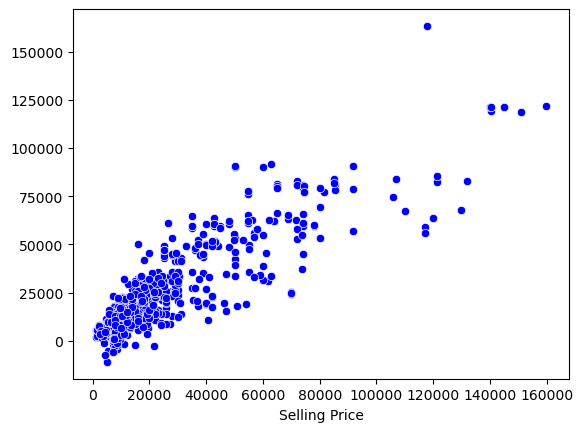

In [39]:
sns.scatterplot(x=y_test, y=y_pred, color='blue')

In [40]:
model = sm.OLS(y, X).fit()

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling Price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     262.2
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        11:28:30   Log-Likelihood:                -28077.
No. Observations:                2601   AIC:                         5.623e+04
Df Residuals:                    2564   BIC:                         5.645e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Memory               1190.0432    151.893      7.835      0.000     892.197    1487.890
Storage               133.2584      3.751     35.524      0.000     125.903     140.614
Rating               4574.4603   1224.762      3.735      0.000    2172.837    6976.084
Discount                0.9631      0.064     15.021      0.000       0.837       1.089
discount percentage  -415.0518     29.085    -14.270      0.000    -472.084    -358.019
brand_ASUS          -1.119e+04   5277.314     -2.121      0.034   -2.15e+04    -844.849
brand_Apple          2.421e+04   5756.539      4.206      0.000    1.29e+04    3.55e+04
brand_GIONEE        -1.134e+04   5037.113     -2.251      0.024   -2.12e+04   -1463.774
brand_Google Pixel   3.058e+04   6155.411      4.967      0.000    1.85e+04    4.26e+04
brand_HTC            5929.8802   5372.010      1.104      0.270   -4604.038    1.65e+04
brand_IQOO          -1.877e+04   7621.922     -2.462      0.014   -3.37e+04   -3820.347
brand_Infinix       -1.579e+04   5448.427     -2.897      0.004   -2.65e+04   -5101.429
brand_LG            -5683.0567   5133.891     -1.107      0.268   -1.58e+04    4383.936
brand_Lenovo        -1.076e+04   5210.483     -2.065      0.039    -2.1e+04    -541.394
brand_Motorola      -1.088e+04   5392.728     -2.017      0.044   -2.14e+04    -300.802
brand_Nokia         -9557.6207   5157.035     -1.853      0.064   -1.97e+04     554.756
brand_OPPO          -1.476e+04   5419.979     -2.723      0.007   -2.54e+04   -4130.427
brand_POCO          -1.722e+04   5668.241     -3.037      0.002   -2.83e+04   -6102.269
brand_SAMSUNG       -6952.2828   5300.708     -1.312      0.190   -1.73e+04    3441.821
brand_Xiaomi        -1.582e+04   5448.428     -2.903      0.004   -2.65e+04   -5134.098
brand_realme          -1.8e+04   5523.163     -3.258      0.001   -2.88e+04   -7166.125
brand_vivo          -1.391e+04   5611.214     -2.479      0.013   -2.49e+04   -2905.289
color_Black         -4310.8345   1701.575     -2.533      0.011   -7647.436    -974.233
color_Blue          -4740.1509   1732.579     -2.736      0.006   -8137.547   -1342.755
color_Coral         -8810.6730   4148.529     -2.124      0.034   -1.69e+04    -675.866
color_Cyan          -5235.2180   3787.624     -1.382      0.167   -1.27e+04    2191.894
color_Gold          -1257.4520   1819.601     -0.691      0.490   -4825.489    2310.585
color_Gray           1821.8678   3031.038      0.601      0.548   -4121.663    7765.399
color_Green         -1095.6692   1961.887     -0.558      0.577   -4942.712    2751.374
color_Mint          -8282.7181   3826.787     -2.164      0.031   -1.58e+04    -778.812
color_Pink           6238.8556   3563.905      1.751      0.080    -749.569    1.32e+04
color_Purple        -3078.5944   2239.639     -1.375      0.169   -7470.280    1313.091
col

In [86]:
model_tree = DecisionTreeRegressor(max_depth=54)

In [87]:
model_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=54)

In [88]:
y_pred_RTree = model_tree.predict(X_test)

In [89]:
r2 = r2_score(y_test, y_pred_RTree)
mape = mean_absolute_percentage_error(y_test, y_pred_RTree)
print(f'R2: {r2 * 100:.2f}%')
print(f'MAPE: {mape * 100:.2f}%')

R2: 80.06%
MAPE: 25.32%


In [90]:
lst = []
for i in range(1, 100):
    model_tree = DecisionTreeRegressor(max_depth=i)
    model_tree.fit(X_train, y_train)
    y_pred_RTree = model_tree.predict(X_test)
    j = r2_score(y_test, y_pred_RTree)
    lst.append(j)

In [47]:
np.where(lst == max(lst))[0][0]

54

<Axes: xlabel='Selling Price'>

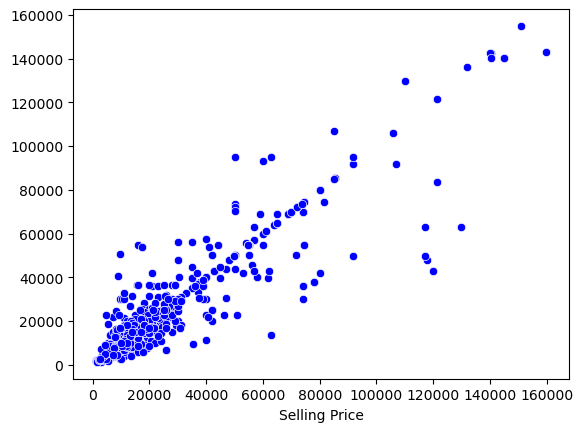

In [91]:
sns.scatterplot(x=y_test, y=y_pred_RTree, color='blue')

In [49]:
rf = RandomForestRegressor()   

In [50]:
rf.fit(X_train, y_train)       
y_pred_rf = rf.predict(X_test) 

In [51]:
r2 = r2_score(y_test, y_pred_rf)
mape = mean_absolute_percentage_error(y_test, y_pred_rf)
print(f'R2: {r2 * 100:.2f}%')
print(f'MAPE: {mape * 100:.2f}%')

R2: 86.60%
MAPE: 20.68%


<Axes: xlabel='Selling Price'>

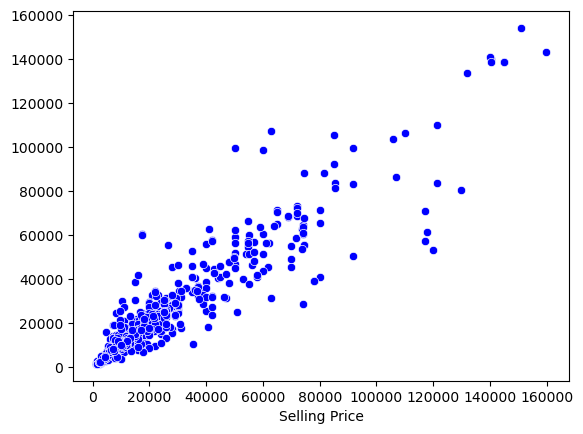

In [52]:
sns.scatterplot(x=y_test, y=y_pred_rf, color='blue')

In [53]:
bag = BaggingRegressor()

In [54]:
bag.fit(X_train, y_train)

BaggingRegressor()

In [55]:
y_pred_bag = bag.predict(X_test)

In [56]:
r2 = r2_score(y_test, y_pred_bag)
mape = mean_absolute_percentage_error(y_test, y_pred_bag)
print(f'R2: {r2 * 100:.2f}%')
print(f'MAPE: {mape * 100:.2f}%')

R2: 85.54%
MAPE: 23.05%


<Axes: xlabel='Selling Price'>

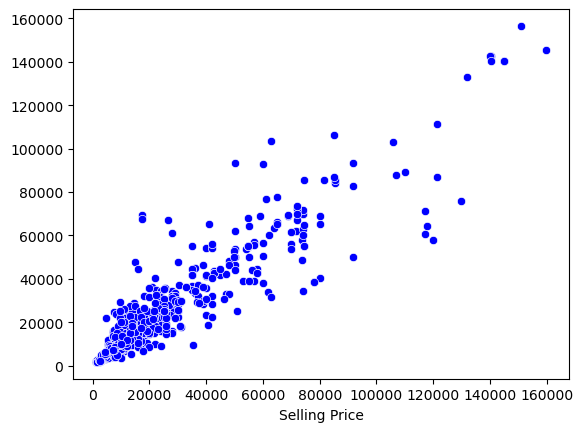

In [57]:
sns.scatterplot(x=y_test, y=y_pred_bag, color='blue')

In [58]:
gbr = GradientBoostingRegressor()

In [59]:
gbr.fit(X_train, y_train) 
y_pred_gbr = gbr.predict(X_test) 

In [60]:
r2 = r2_score(y_test, y_pred_gbr)
mape = mean_absolute_percentage_error(y_test, y_pred_gbr)
print(f'R2: {r2 * 100:.2f}%')
print(f'MAPE: {mape * 100:.2f}%')

R2: 85.46%
MAPE: 30.20%


<Axes: xlabel='Selling Price'>

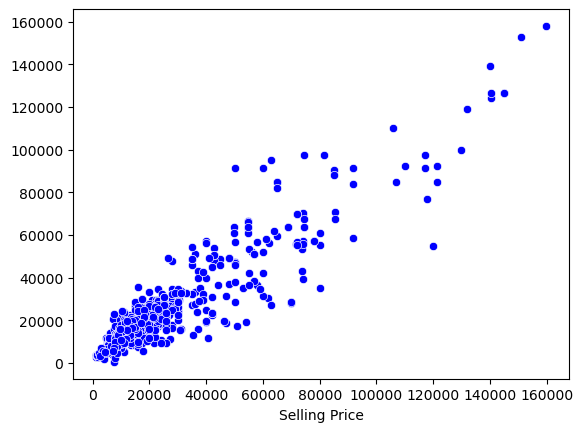

In [61]:
sns.scatterplot(x=y_test, y=y_pred_gbr, color='blue')

In [62]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 100, alpha = 10, n_estimators = 100)

In [63]:
xg_reg.fit(X_train,y_train)
y_pred_xg = xg_reg.predict(X_test)

C:\Users\LENOVO\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [11:28:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [64]:
r2 = r2_score(y_test, y_pred_xg)
mape = mean_absolute_percentage_error(y_test, y_pred_xg)
print(f'R2: {r2 * 100:.2f}%')
print(f'MAPE: {mape * 100:.2f}%')

R2: 88.17%
MAPE: 25.52%


<Axes: xlabel='Selling Price'>

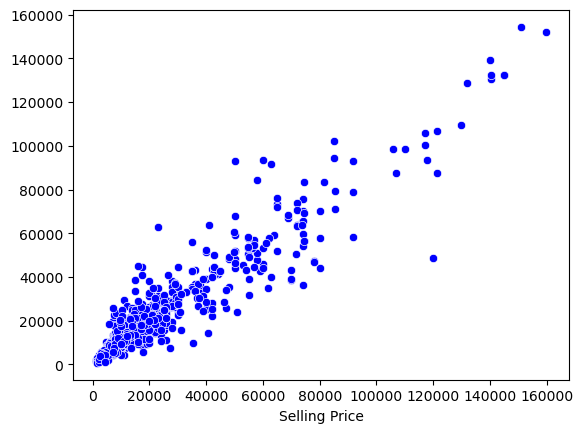

In [76]:
sns.scatterplot(x=y_test, y=y_pred_xg, color='blue')

In [77]:
from catboost import CatBoostRegressor

In [67]:
cat = CatBoostRegressor()

In [104]:
cat.fit(X_train, y_train)

Learning rate set to 0.045006
0:	learn: 25309.7149257	total: 3.97ms	remaining: 3.96s
1:	learn: 24619.9423008	total: 8.19ms	remaining: 4.09s
2:	learn: 23936.0318192	total: 12.5ms	remaining: 4.16s
3:	learn: 23239.5379944	total: 16.9ms	remaining: 4.2s
4:	learn: 22588.8170529	total: 21.3ms	remaining: 4.24s
5:	learn: 21992.9599298	total: 25.2ms	remaining: 4.17s
6:	learn: 21438.6556191	total: 29.2ms	remaining: 4.14s
7:	learn: 20909.2977166	total: 33.3ms	remaining: 4.13s
8:	learn: 20357.4937037	total: 37ms	remaining: 4.07s
9:	learn: 19866.6417231	total: 40.8ms	remaining: 4.04s
10:	learn: 19414.8548814	total: 44.3ms	remaining: 3.98s
11:	learn: 18934.2103181	total: 48ms	remaining: 3.95s
12:	learn: 18488.3221444	total: 51.5ms	remaining: 3.91s
13:	learn: 18071.4814543	total: 54.9ms	remaining: 3.87s
14:	learn: 17698.4617086	total: 58.7ms	remaining: 3.85s
15:	learn: 17354.2017387	total: 62.6ms	remaining: 3.85s
16:	learn: 16990.4365305	total: 66.3ms	remaining: 3.83s
17:	learn: 16638.7452874	total: 7

In [69]:
y_pred_cat = cat.predict(X_test)

In [70]:
r2 = r2_score(y_test, y_pred_cat)
mape = mean_absolute_percentage_error(y_test, y_pred_cat)
print(f'R2: {r2 * 100:.2f}%')
print(f'MAPE: {mape * 100:.2f}%')


R2: 89.32%
MAPE: 23.29%


<Axes: xlabel='Selling Price'>

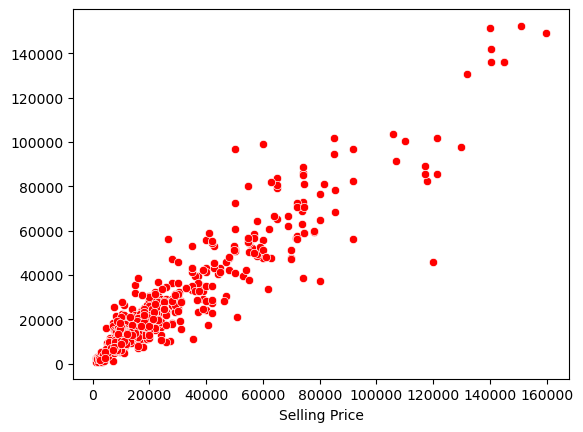

In [71]:
sns.scatterplot(x=y_test, y=y_pred_cat, color='red')

<Axes: xlabel='Selling Price'>

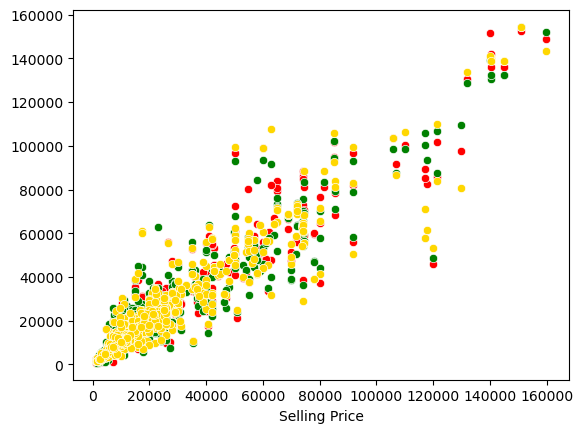

In [72]:
sns.scatterplot(x=y_test, y=y_pred_cat, color='red')
sns.scatterplot(x=y_test, y=y_pred_xg, color='green')
sns.scatterplot(x=y_test, y=y_pred_rf, color='gold')

In [105]:
cat.fit(X_train, y_train, plot=True, eval_set=(X_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.055941
0:	learn: 25128.7845344	test: 23457.0317605	best: 23457.0317605 (0)	total: 4.34ms	remaining: 4.33s
1:	learn: 24282.7546868	test: 22670.9004419	best: 22670.9004419 (1)	total: 8.55ms	remaining: 4.27s
2:	learn: 23454.8971236	test: 21945.1963327	best: 21945.1963327 (2)	total: 12.7ms	remaining: 4.21s
3:	learn: 22620.7917351	test: 21212.6366465	best: 21212.6366465 (3)	total: 16.7ms	remaining: 4.15s
4:	learn: 21983.6324075	test: 20580.3849044	best: 20580.3849044 (4)	total: 20.7ms	remaining: 4.12s
5:	learn: 21282.2104402	test: 19979.8042208	best: 19979.8042208 (5)	total: 24.6ms	remaining: 4.07s
6:	learn: 20631.1348642	test: 19437.9786268	best: 19437.9786268 (6)	total: 28.6ms	remaining: 4.05s
7:	learn: 20021.7655107	test: 18933.6165697	best: 18933.6165697 (7)	total: 32.7ms	remaining: 4.06s
8:	learn: 19420.2177186	test: 18421.1557417	best: 18421.1557417 (8)	total: 36.9ms	remaining: 4.06s
9:	learn: 18869.8853925	test: 17976.0712075	best: 17976.0712075 (9)	total: 41ms

In [92]:
reg_res = {'Algoritm': ['LinearRegression( )', 'DecisionTreeRegressor( )', 'RandomForestRegressor( )', 
           'BaggingRegressor( )', 'GradientBoostingRegressor( )', 'XGBRegressor( )', 'CatBoostRegressor( )'],
           'R2': ['77%', '80.6%', '86.9%', '87.1%', '85.5%', '88.1%', '89.3%'],
           'MAPE': ['44.58%', '25.36%', '21.00%', '21.36%', '30.16%', '25.52%', '23.29%']}
df = pd.DataFrame(reg_res)
df

,Algoritm,R2,MAPE
0,LinearRegression( ),77%,44.58%
1,DecisionTreeRegressor( ),80.6%,25.36%
2,RandomForestRegressor( ),86.9%,21.00%
3,BaggingRegressor( ),87.1%,21.36%
4,GradientBoostingRegressor( ),85.5%,30.16%
5,XGBRegressor( ),88.1%,25.52%
6,CatBoostRegressor( ),89.3%,23.29%
